<a href="https://colab.research.google.com/github/rachelyayra/audio-ml-project/blob/main/Stopnstop.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**This Notebook contains the code to classify a start and a stop sound**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Importing important libraries and packages

In [2]:
pip install ffmpeg

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns

from glob import glob

import librosa
import librosa.display
import IPython.display as ipd
import ffmpeg

from itertools import cycle

sns.set_theme(style="white", palette=None)
color_pal = plt.rcParams["axes.prop_cycle"].by_key()["color"]
color_cycle = cycle(plt.rcParams["axes.prop_cycle"].by_key()["color"])

In [4]:
start_audio = glob('/content/drive/My Drive/sounds/start/*.m4a')
stop_audio = glob('/content/drive/My Drive/sounds/stop/*.m4a')

In [5]:
print(stop_audio)

['/content/drive/My Drive/sounds/stop/stop_1.m4a', '/content/drive/My Drive/sounds/stop/stop_2.m4a', '/content/drive/My Drive/sounds/stop/stop_3.m4a', '/content/drive/My Drive/sounds/stop/stop_4.m4a', '/content/drive/My Drive/sounds/stop/stop_5.m4a', '/content/drive/My Drive/sounds/stop/stop_6.m4a', '/content/drive/My Drive/sounds/stop/stop_7.m4a', '/content/drive/My Drive/sounds/stop/stop_8.m4a', '/content/drive/My Drive/sounds/stop/stop_9.m4a', '/content/drive/My Drive/sounds/stop/stop_10.m4a', '/content/drive/My Drive/sounds/stop/stop_11.m4a', '/content/drive/My Drive/sounds/stop/stop_12.m4a', '/content/drive/My Drive/sounds/stop/stop_13.m4a', '/content/drive/My Drive/sounds/stop/stop_14.m4a']


In [6]:
#play audio file
ipd.Audio(start_audio[0])

In [7]:
ipd.Audio(stop_audio[0])

In [8]:
y , sr = librosa.load(start_audio[0])
print(f'y: {y[:10]}')
print(f'shape y: {y.shape}')
print(f'sr: {sr}')
x , sr = librosa.load(stop_audio[0])
print(f'x: {x[:10]}')
print(f'shape x: {x.shape}')
print(f'sr: {sr}')

/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


y: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
shape y: (29184,)
sr: 22050
x: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
shape x: (32768,)
sr: 22050


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


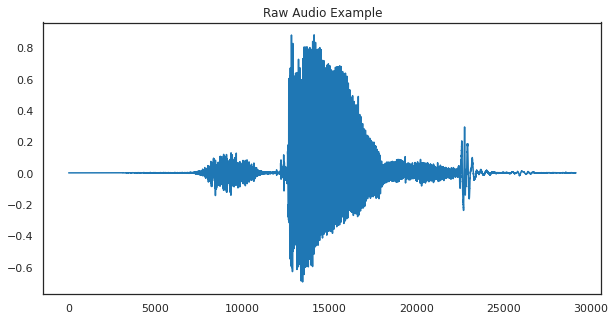

In [9]:
pd.Series(y).plot(figsize=(10, 5),
                  title='Raw Audio Example',
                 color=color_pal[0])
plt.show()

In [10]:
y_trimmed, _ = librosa.effects.trim(y, top_db= 45)

In [11]:
print(y_trimmed)


[0.00114035 0.00102273 0.00028842 ... 0.00161891 0.00161831 0.00180998]


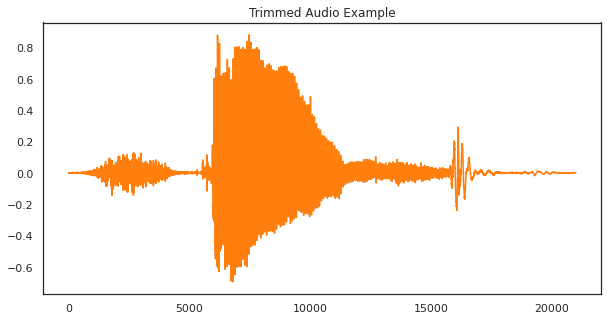

In [12]:
pd.Series(y_trimmed).plot(figsize=(10, 5),
                  title='Trimmed Audio Example',
                 color=color_pal[1])
plt.show()

In [13]:
D = librosa.stft(y)
S_db = librosa.amplitude_to_db(np.abs(D), ref=np.max)
S_db.shape
B = librosa.stft(x)
B_db = librosa.amplitude_to_db(np.abs(B), ref=np.max)
B_db.shape

(1025, 65)

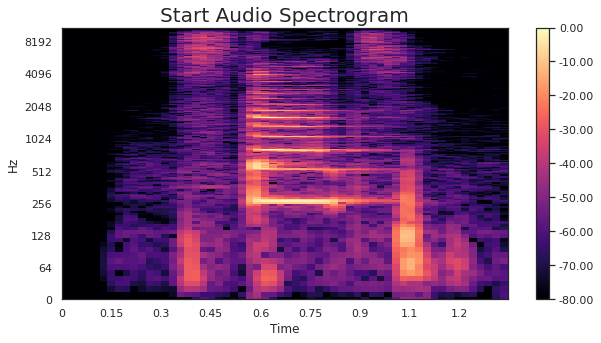

In [14]:
fig, ax = plt.subplots(figsize=(10, 5))
img = librosa.display.specshow(S_db,
                              x_axis='time',
                              y_axis='log',
                              ax=ax)
ax.set_title('Start Audio Spectrogram', fontsize=20)
fig.colorbar(img, ax=ax, format=f'%0.2f')
plt.show()

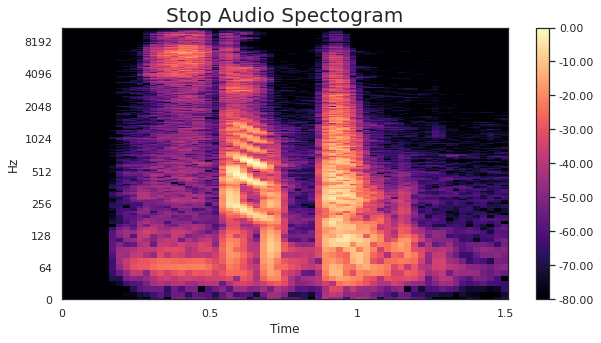

In [15]:
fig, ax = plt.subplots(figsize=(10, 5))
img = librosa.display.specshow(B_db,
                              x_axis='time',
                              y_axis='log',
                              ax=ax)
ax.set_title('Stop Audio Spectogram', fontsize=20)
fig.colorbar(img, ax=ax, format=f'%0.2f')
plt.show()

In [16]:
S = librosa.feature.melspectrogram(y=y,
                                   sr=sr,
                                   n_mels=128 * 2,)
S_db_mel = librosa.amplitude_to_db(S, ref=np.max)

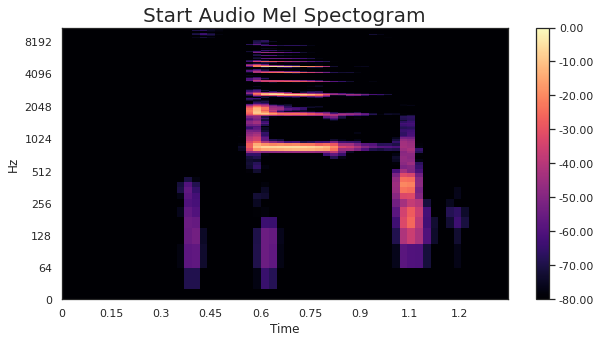

In [17]:
fig, ax = plt.subplots(figsize=(10, 5))
# Plot the mel spectogram
img = librosa.display.specshow(S_db_mel,
                              x_axis='time',
                              y_axis='log',
                              ax=ax)
ax.set_title('Start Audio Mel Spectogram', fontsize=20)
fig.colorbar(img, ax=ax, format=f'%0.2f')
plt.show()

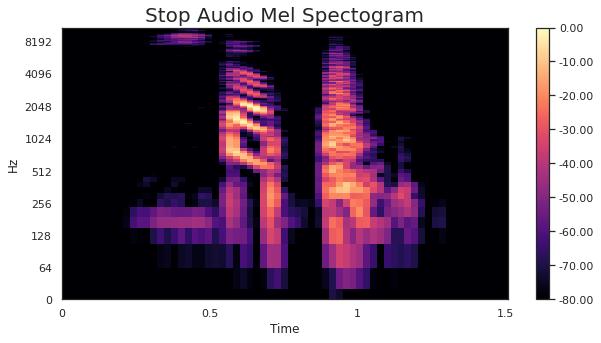

In [18]:
V = librosa.feature.melspectrogram(y=x,
                                   sr=sr,
                                   n_mels=128 * 2,)
V_db_mel = librosa.amplitude_to_db(V, ref=np.max)
fig, ax = plt.subplots(figsize=(10, 5))
# Plot the mel spectogram
img = librosa.display.specshow(V_db_mel,
                              x_axis='time',
                              y_axis='log',
                              ax=ax)
ax.set_title('Stop Audio Mel Spectogram', fontsize=20)
fig.colorbar(img, ax=ax, format=f'%0.2f')
plt.show()

In [19]:
V_db_mel.shape

(256, 65)

In [20]:
def mel_feq_extractor(file):
  y , sr = librosa.load(file)
  mfcc_features = librosa.feature.mfcc(y=y,
                                   sr=sr,
                                   n_mels=128 * 2,)
  mfcc_scaled = np.mean(mfcc_features.T, axis = 0)
  return mfcc_scaled




In [21]:
import numpy as np
from tqdm import tqdm
### Now we iterate through every audio file and extract features 
### using Mel-Frequency Cepstral Coefficients
start_features=[]
for i in start_audio:
    data = mel_feq_extractor(i)
    start_features.append(data)

/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/usr/local/lib/python3.7/dist-packages/librosa/cor

In [22]:
stop_features=[]
for i in stop_audio:
    data = mel_feq_extractor(i)
    stop_features.append(data)

/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/usr/local/lib/python3.7/dist-packages/librosa/cor

In [23]:
start_df = pd.DataFrame(start_features)
start_pc = pd.DataFrame(start_features)
start_df['label'] = 1
print(start_df)
stop_df = pd.DataFrame(stop_features)
stop_pc = pd.DataFrame(stop_features)
stop_df['label'] = 0
print(stop_df)

             0           1          2          3          4          5  \
0  -509.197937   76.155609  22.017698  14.272648  -5.218720  16.266539   
1  -488.449738   80.571907  37.511982   9.628599  -8.986348  16.333097   
2  -450.468964   93.293518  29.975365   4.086243  -2.172614  20.279409   
3  -420.920471   81.272583  28.305939  27.094307  -9.581820  20.929823   
4  -458.673218   90.541916  32.164196   6.395102  -4.342591  18.225273   
5  -528.610657   73.301750  37.647156  18.482285  -1.337085   3.594694   
6  -416.268219   79.969658  30.513666  24.547173  -6.503543   7.478018   
7  -373.550812   64.632523  22.906130  33.282467  -8.412034  12.380284   
8  -462.721283   70.175659  29.674103  28.914028   1.120954   8.995308   
9  -430.154266   91.187279   6.074091  -1.235594 -21.248243  26.520105   
10 -478.566467   74.874596   6.729766  -8.876472 -19.034426   8.891645   
11 -514.141296   89.104614  32.382885   7.128593  -8.182425  17.649254   
12 -540.313110   62.905605  28.468462 

In [24]:
dataset = pd.concat([start_df, stop_df]).reset_index()
stop_pc['label'] = 0
start_pc['label'] = 1
pc_check = pd.concat([start_pc, stop_pc]).reset_index().drop(columns = 'index')
y = pc_check['label']
pc_check = pc_check.drop(columns = ['label'])

In [25]:
pc_check

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,-509.197937,76.155609,22.017698,14.272648,-5.218720,16.266539,-17.851536,-11.080347,1.887307,7.596374,-3.950268,0.522876,-3.925360,4.652847,0.649902,-1.277371,-7.422591,9.147238,-9.860715,1.742783
1,-488.449738,80.571907,37.511982,9.628599,-8.986348,16.333097,-18.631838,0.596624,-4.060445,8.934700,-10.864620,-4.088390,-2.582968,2.658262,2.420343,-4.542972,-5.505137,5.201333,-7.019744,6.149752
2,-450.468964,93.293518,29.975365,4.086243,-2.172614,20.279409,-25.712543,6.355951,-7.077755,12.481092,-7.063737,-0.195006,-5.936242,3.623305,2.320814,-3.603128,-1.798136,2.927691,-8.964450,6.182969
3,-420.920471,81.272583,28.305939,27.094307,-9.581820,20.929823,-9.748301,2.674769,-9.448915,5.129744,-13.855064,-4.170138,-6.682238,0.327439,2.402502,-4.314525,1.309575,2.351415,-12.079708,8.103861
4,-458.673218,90.541916,32.164196,6.395102,-4.342591,18.225273,-7.847851,3.165132,-5.732286,8.327825,-3.591089,-5.050123,-5.462203,5.230432,0.905655,-4.920807,-11.718367,1.232859,-12.206045,9.475528
5,-528.610657,73.301750,37.647156,18.482285,-1.337085,3.594694,-12.273171,4.803911,-6.384098,-0.003864,-2.694383,-2.721204,-2.811369,-3.399644,0.617948,-4.133796,-4.086707,4.411042,-1.557620,5.502224
6,-416.268219,79.969658,30.513666,24.547173,-6.503543,7.478018,-9.513997,-5.594680,-8.507624,-5.561027,-4.702192,-6.736241,-13.307084,-2.039424,0.721586,-5.932571,-5.098988,2.905487,-2.685868,10.412350
7,-373.550812,64.632523,22.906130,33.282467,-8.412034,12.380284,-13.714321,7.568081,-20.683418,-1.228402,-16.630333,-4.233128,-13.572701,-4.201401,6.721216,0.551855,12.991395,8.448197,-5.063201,10.821327
8,-462.721283,70.175659,29.674103,28.914028,1.120954,8.995308,-6.147647,1.943633,-6.789764,-4.602467,0.165551,-5.020142,-5.559825,-0.411999,-0.032035,-3.328215,-3.989585,4.994860,-2.939581,8.868027
9,-430.154266,91.187279,6.074091,-1.235594,-21.248243,26.520105,-13.273029,-7.108377,-3.336139,8.061044,-4.225306,-15.002691,-9.758257,8.274436,-7.995287,-4.878336,-7.640782,3.090632,0.264902,8.572454


In [26]:
from sklearn.decomposition import PCA
pca = PCA(n_components=5)
pc = pca.fit_transform(pc_check)
pc= pd.DataFrame(pc)
print(pc)

             0          1          2          3          4
0    33.529156 -27.807913  -0.604468  -6.826869  -9.812248
1    14.368926 -19.409779   0.026691  -9.002969   9.458652
2   -19.837612  -5.070687  15.710572 -16.105028  12.629630
3   -53.459518  -1.445973  -1.615966  -5.950676   0.746780
4   -11.683302  -5.090933   8.962351 -17.553516   6.791086
5    50.754593 -29.503956 -20.771732  -0.609794   8.108298
6   -58.279156  -4.203129  -2.721272  -1.222788   2.080627
7  -105.486885  -9.753612  -6.264782   4.870735   6.751545
8   -14.922442 -17.718149 -18.736790  -4.364120  -2.608262
9   -39.787643  -6.514366  37.601803  -6.317518  -6.134181
10    3.645216 -36.368885  29.871666   7.283616  -0.017377
11   42.330391 -14.904416  -0.234228 -10.755342   6.033828
12   61.533867 -43.497833  -9.885532   0.067505  -3.248733
13   39.503155 -25.267447  14.470063   6.833920  -1.606687
14  -38.978542  23.330425  10.323217  -3.672680   1.472608
15   36.848431  17.026964  -9.826843   3.299594  -5.6167

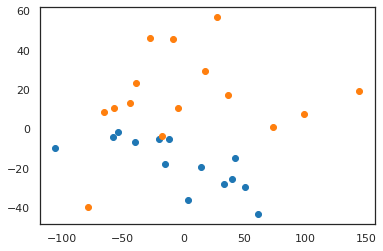

In [27]:
for frame in [pc[0:14], pc[14:29]]:
  plt.scatter(frame[0], frame[1])

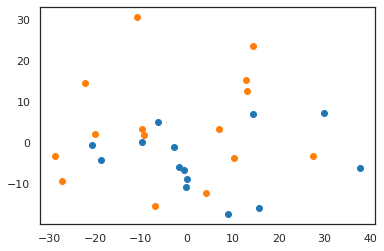

In [28]:
for frame in [pc[0:14], pc[14:29]]:
  plt.scatter(frame[2], frame[3])

In [29]:
print(pc)

             0          1          2          3          4
0    33.529156 -27.807913  -0.604468  -6.826869  -9.812248
1    14.368926 -19.409779   0.026691  -9.002969   9.458652
2   -19.837612  -5.070687  15.710572 -16.105028  12.629630
3   -53.459518  -1.445973  -1.615966  -5.950676   0.746780
4   -11.683302  -5.090933   8.962351 -17.553516   6.791086
5    50.754593 -29.503956 -20.771732  -0.609794   8.108298
6   -58.279156  -4.203129  -2.721272  -1.222788   2.080627
7  -105.486885  -9.753612  -6.264782   4.870735   6.751545
8   -14.922442 -17.718149 -18.736790  -4.364120  -2.608262
9   -39.787643  -6.514366  37.601803  -6.317518  -6.134181
10    3.645216 -36.368885  29.871666   7.283616  -0.017377
11   42.330391 -14.904416  -0.234228 -10.755342   6.033828
12   61.533867 -43.497833  -9.885532   0.067505  -3.248733
13   39.503155 -25.267447  14.470063   6.833920  -1.606687
14  -38.978542  23.330425  10.323217  -3.672680   1.472608
15   36.848431  17.026964  -9.826843   3.299594  -5.6167

In [30]:
X = pc

In [31]:
print(X)

             0          1          2          3          4
0    33.529156 -27.807913  -0.604468  -6.826869  -9.812248
1    14.368926 -19.409779   0.026691  -9.002969   9.458652
2   -19.837612  -5.070687  15.710572 -16.105028  12.629630
3   -53.459518  -1.445973  -1.615966  -5.950676   0.746780
4   -11.683302  -5.090933   8.962351 -17.553516   6.791086
5    50.754593 -29.503956 -20.771732  -0.609794   8.108298
6   -58.279156  -4.203129  -2.721272  -1.222788   2.080627
7  -105.486885  -9.753612  -6.264782   4.870735   6.751545
8   -14.922442 -17.718149 -18.736790  -4.364120  -2.608262
9   -39.787643  -6.514366  37.601803  -6.317518  -6.134181
10    3.645216 -36.368885  29.871666   7.283616  -0.017377
11   42.330391 -14.904416  -0.234228 -10.755342   6.033828
12   61.533867 -43.497833  -9.885532   0.067505  -3.248733
13   39.503155 -25.267447  14.470063   6.833920  -1.606687
14  -38.978542  23.330425  10.323217  -3.672680   1.472608
15   36.848431  17.026964  -9.826843   3.299594  -5.6167

In [32]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.45, stratify = y , random_state=2)

In [33]:
y

0     1
1     1
2     1
3     1
4     1
5     1
6     1
7     1
8     1
9     1
10    1
11    1
12    1
13    1
14    1
15    0
16    0
17    0
18    0
19    0
20    0
21    0
22    0
23    0
24    0
25    0
26    0
27    0
28    0
Name: label, dtype: int64

In [34]:
X_train 

,0,1,2,3,4
8,-14.922442,-17.718149,-18.736790,-4.364120,-2.608262
1,14.368926,-19.409779,0.026691,-9.002969,9.458652
19,-17.641020,-3.794876,-28.694950,-3.256409,-16.095366
18,-43.668716,13.247647,-27.130972,-9.424706,-5.029150
10,3.645216,-36.368885,29.871666,7.283616,-0.017377
0,33.529156,-27.807913,-0.604468,-6.826869,-9.812248
9,-39.787643,-6.514366,37.601803,-6.317518,-6.134181
2,-19.837612,-5.070687,15.710572,-16.105028,12.629630
11,42.330391,-14.904416,-0.234228,-10.755342,6.033828
26,73.764336,1.010072,6.895857,3.230369,-5.583971


In [35]:
from sklearn.svm import SVC
clf = SVC(C=10,kernel='rbf')
clf.fit(X_train, y_train)

SVC(C=10)

In [36]:
from sklearn.metrics import accuracy_score
predictions = clf.predict(X_test)
print(accuracy_score(predictions, y_test))

0.7857142857142857


In [37]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
C= [ 1,10,15,20,25,30,100,1000]
kernel = ['rbf', 'linear']
param_grid = dict(C = C,kernel = kernel)
searcher = GridSearchCV(clf, n_jobs=-1, cv=5,
	param_grid=param_grid, scoring="accuracy")
searchResults = searcher.fit(X, y)

In [38]:
print(searchResults.best_score_)
print(searchResults.best_params_)


0.8266666666666668
{'C': 10, 'kernel': 'rbf'}


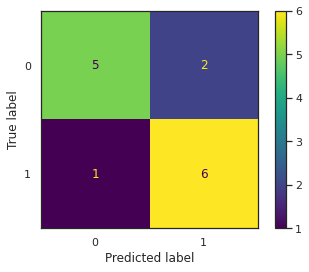

In [39]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(clf, X_test, y_test)

Misclasifies the start commands


usually misclassifies the starts